In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/Colab Notebooks/ml/linear regression Advertising.csv'


df = pd.read_csv(file_path)

df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']

<Axes: xlabel='total_spend', ylabel='sales'>

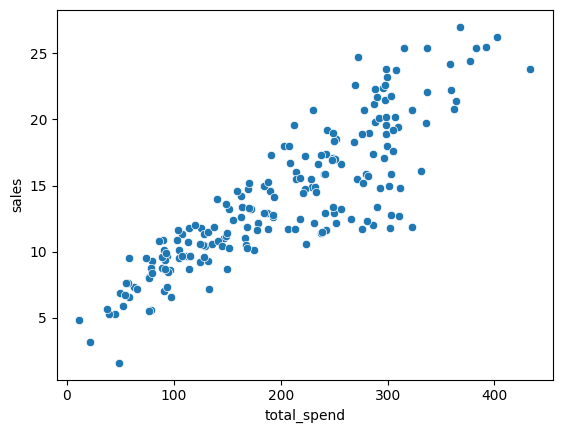

In [ ]:
sns.scatterplot(x='total_spend',y='sales',data=df)

<Axes: xlabel='total_spend', ylabel='sales'>

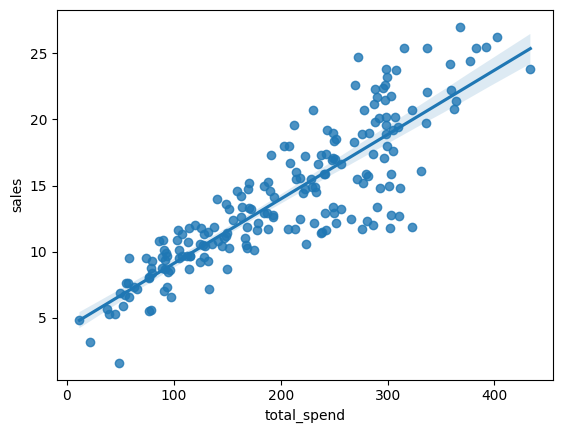

In [ ]:
# Basically, we want to figure out how to create this line
sns.regplot(x='total_spend',y='sales',data=df)

Simple Linear Regression

$$y=mx+b$$


$$ \hat{y} = \beta_0 + \beta_1X$$



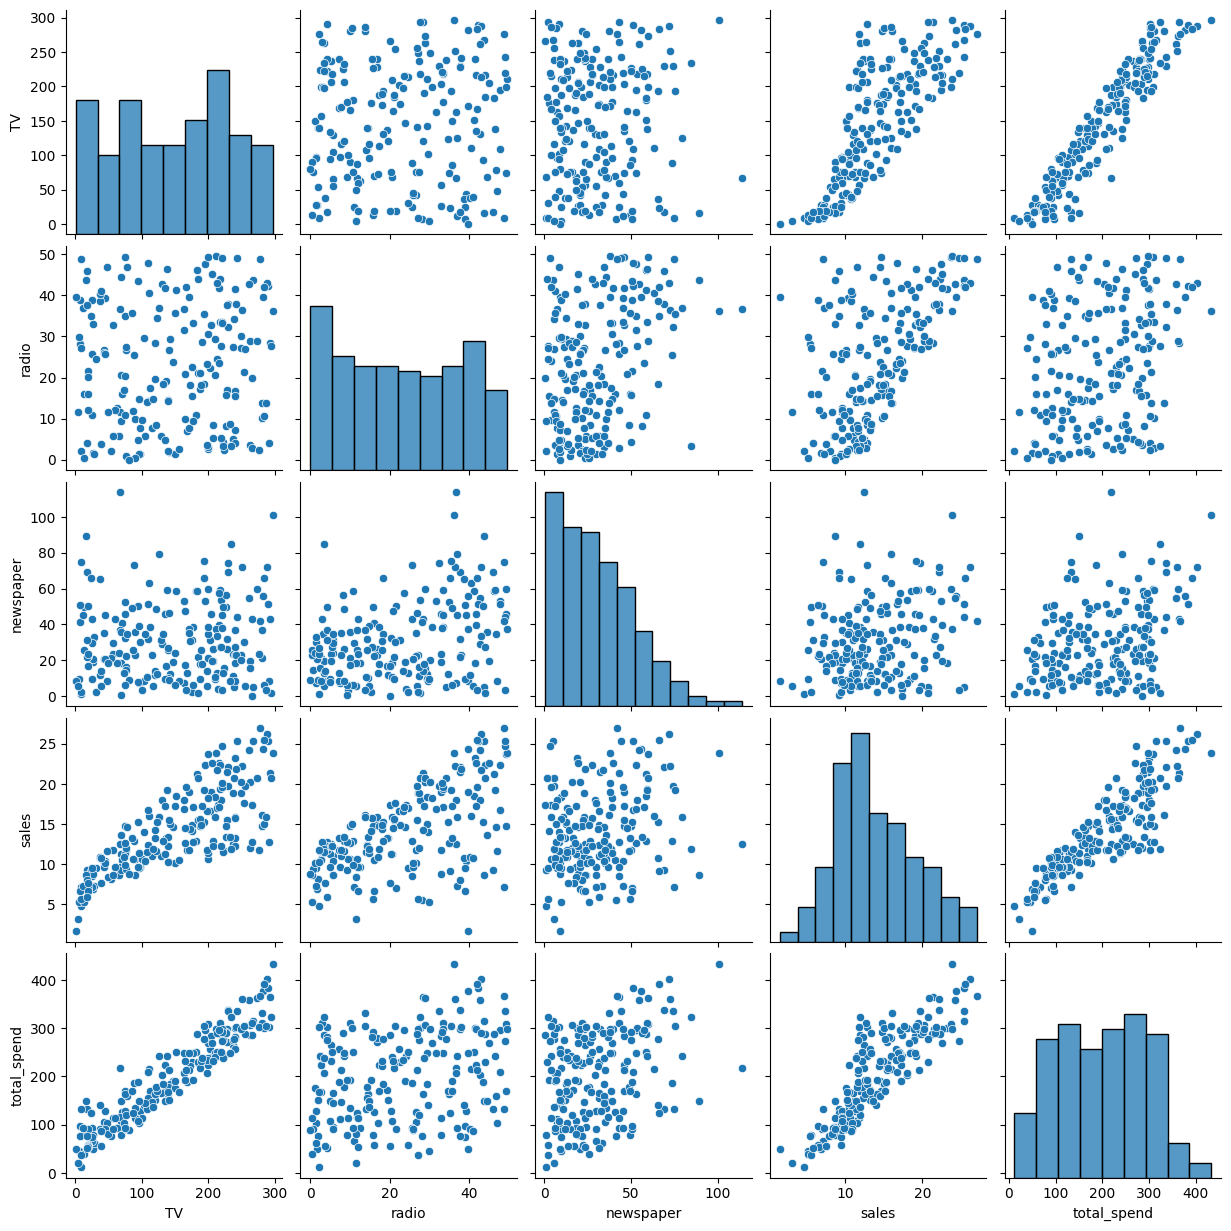

In [ ]:
sns.pairplot(df)

<Axes: >

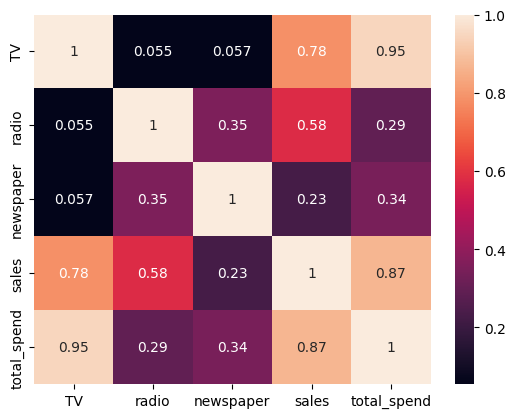

In [ ]:
sns.heatmap(df.corr(), annot=True)

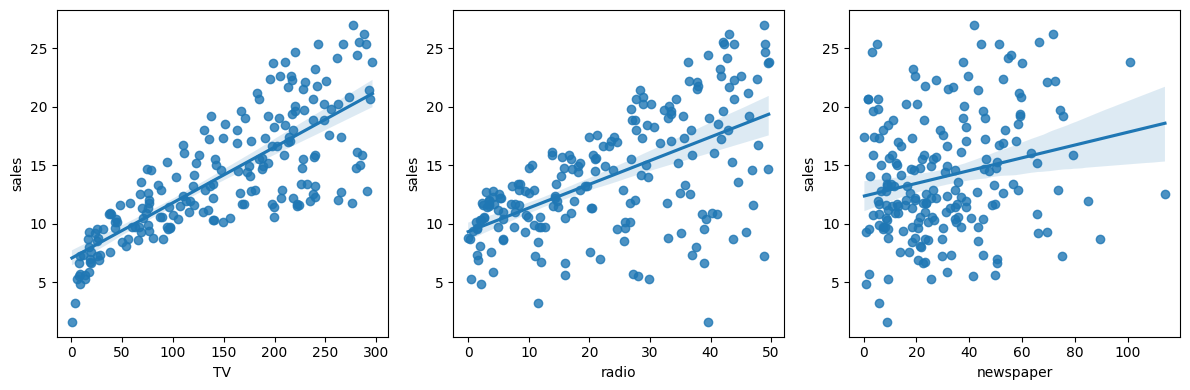

In [ ]:
# Individual Plots
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.regplot(x='TV', y='sales', data=df)

plt.subplot(1, 3, 2)
sns.regplot(x='radio', y='sales', data=df)

plt.subplot(1, 3, 3)
sns.regplot(x='newspaper', y='sales', data=df)

plt.tight_layout()
plt.show()


In [ ]:
X = df['total_spend']
y = df['sales']

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Fitting a model requires requires a 2D array. Have to reshape for the model i.e (n_samples, n_features)
# the error is basically saying to convert the flat feature array into a column array. (convert 1D > 2D)
# reshape(-1, 1) does the job; also [:, None] can be used.
X_train = X_train.values[:, None]
X_test = X_test.values[:, None]


# Creating a Linear Regression Model
lm = LinearRegression()

# Training/Fitting the model
lm.fit(X_train,y_train)


# Predicting Test Data
predictions = lm.predict(X_test)


print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


MAE: 1.8958924224568927
MSE: 5.921660160912181
RMSE: 2.433446149170386


Comparison predicted and true enterprise value

In [ ]:
d = {'true': y_test, 'predicted': predictions}
df = pd.DataFrame(data=d)

In [ ]:
df['diff'] = df['predicted']-df['true']
df.head()

,true,predicted,diff
37,14.7,12.587538,-2.112462
109,19.8,18.179267,-1.620733
31,11.9,12.544889,0.644889
89,16.7,14.445129,-2.254871
66,9.5,7.303827,-2.196173


In [ ]:
# prompt: save and load model code with joblib dump and load
# test a sample with this saved model
# seperate total spend coloum to 3 orginal colums and give that to model

import numpy as np
from joblib import dump, load

# Save the model
dump(lm, 'advertising_model.joblib')

# Load the saved model
loaded_model = load('advertising_model.joblib')

# Sample data (replace with your actual data)
# Example:
# TV, Radio and Newspaper spend values
sample_tv = 230.1
sample_radio = 37.8
sample_newspaper = 69.2
sample_total_spend = sample_tv + sample_radio + sample_newspaper

# Reshape the input for the model (single sample)
sample_input = np.array([[sample_total_spend]])

# Make a prediction using the loaded model
sample_prediction = loaded_model.predict(sample_input)

print(f"Predicted sales for the given spends: {sample_prediction[0]}")


# Example of how to prepare your input data
# Assume 'new_df' is your new dataframe with TV, radio, and newspaper columns
# new_df['total_spend'] = new_df['TV'] + new_df['radio'] + new_df['newspaper']
# X_new = new_df['total_spend'].values.reshape(-1,1)
# new_predictions = loaded_model.predict(X_new)
# print(new_predictions)


Predicted sales for the given spends: 20.515473068143514
